In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/titanic_toy.csv')

In [3]:
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'])

In [7]:
x_train.isnull().mean()*100

Age       20.359281
Fare       5.838323
Family     0.000000
dtype: float64

# Missing value fillup Using Pandas
## mean/median imputation

In [8]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [9]:
x_train['Age_Mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_Median'] = x_train['Age'].fillna(median_age)

In [10]:
x_train

,Age,Fare,Family,Age_Mean,Age_Median
411,NaN,6.8583,0,30.265038,28.5
191,19.0,13.0000,0,19.000000,19.0
315,26.0,7.8542,0,26.000000,26.0
805,31.0,7.7750,0,31.000000,31.0
453,49.0,89.1042,1,49.000000,49.0
...,...,...,...,...,...
177,50.0,28.7125,0,50.000000,50.0
385,18.0,73.5000,0,18.000000,18.0
133,29.0,NaN,1,29.000000,29.0
374,3.0,21.0750,4,3.000000,3.0


In [11]:
# CHECK VARIANCE
print('Original Age Variable variance',x_train['Age'].var())
print('Mean Age Variable variance', x_train['Age_Mean'].var())
print('Median Age Variable variance',x_train['Age_Median'].var())

Original Age Variable variance 211.16366346374443
Mean Age Variable variance 168.1078040468491
Median Age Variable variance 168.61369412778694


In [12]:
x_train['Fare_Mean'] = x_train['Fare'].fillna(mean_age)
x_train['Fare_Median'] = x_train['Fare'].fillna(median_age)

In [13]:
# CHECK VARIANCE
print('Original Fare Variable variance',x_train['Fare'].var())
print('Mean Fare Variable variance', x_train['Fare_Mean'].var())
print('Median Fare Variable variance',x_train['Fare_Median'].var())

Original Fare Variable variance 2845.7181193222787
Mean Fare Variable variance 2679.594254240369
Median Fare Variable variance 2680.1941388313794


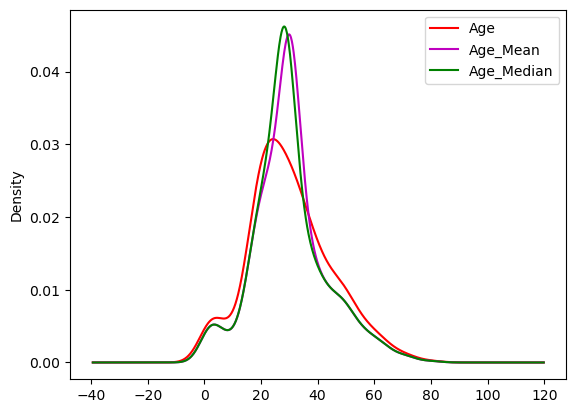

In [14]:
fig = plt.figure()
ax = fig.add_subplot()

x_train['Age'].plot(kind='kde',ax=ax, color='r')
x_train['Age_Mean'].plot(kind='kde', ax=ax, color='m')
x_train['Age_Median'].plot(kind='kde',ax=ax, color='g')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

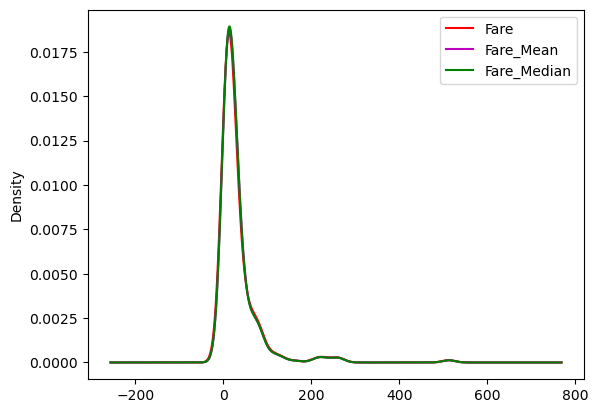

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

x_train['Fare'].plot(kind='kde',ax=ax, color='r')
x_train['Fare_Mean'].plot(kind='kde', ax=ax, color='m')
x_train['Fare_Median'].plot(kind='kde',ax=ax, color='g')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

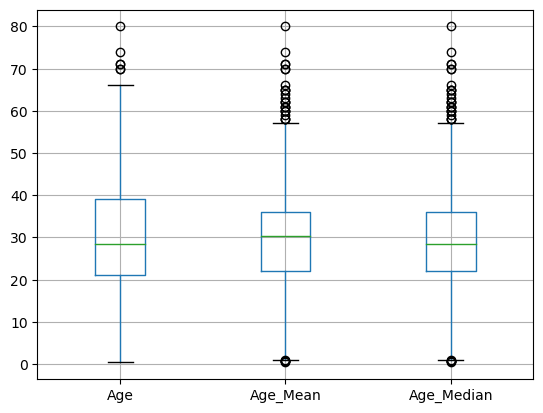

In [16]:
x_train[['Age','Age_Mean','Age_Median']].boxplot()
plt.show()

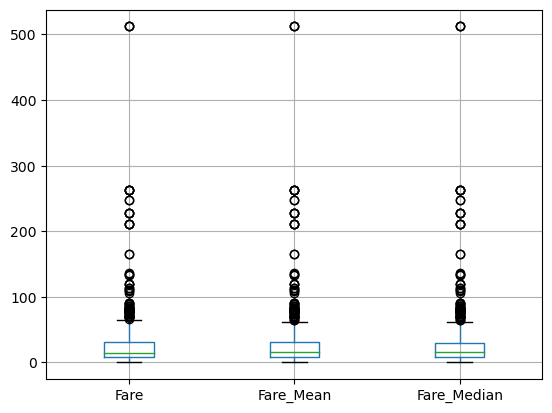

In [17]:
x_train[['Fare','Fare_Mean','Fare_Median']].boxplot()
plt.show()

# Using Sklearn mean/median Imputation

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'])

In [19]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [20]:
trf1 = ColumnTransformer([
    ('impute1',imputer1,['Age']),
    ('impute2',imputer2,['Fare']),
])

In [21]:
trf1.fit(x_train)

ColumnTransformer(transformers=[('impute1', SimpleImputer(), ['Age']),
                                ('impute2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [22]:
trf1.named_transformers_['impute1'].statistics_

array([29.71704331])

In [23]:
trf1.named_transformers_['impute2'].statistics_

array([14.4542])

In [24]:
x_train = trf1.transform(x_train)
x_test = trf1.transform(x_test)

In [25]:
x_train

array([[ 14.        ,  46.9       ],
       [ 70.        ,  10.5       ],
       [ 40.        ,  15.5       ],
       ...,
       [ 21.        ,   8.6625    ],
       [ 24.        , 263.        ],
       [ 29.71704331,  14.5       ]])

# Arbitrary Value Imputation using pandas

In [26]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'])

In [27]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [28]:
x_train['Age_Mean'] = x_train['Age'].fillna(99)
x_train['Age_Median'] = x_train['Age'].fillna(999)

In [29]:
# CHECK VARIANCE
print('Original Age Variable variance',x_train['Age'].var())
print('Mean Age Variable variance', x_train['Age_Mean'].var())
print('Median Age Variable variance',x_train['Age_Median'].var())

Original Age Variable variance 215.9005134097412
Mean Age Variable variance 970.8256749703728
Median Age Variable variance 157614.04391914065


In [30]:
x_train['Fare_Mean'] = x_train['Fare'].fillna(99)
x_train['Fare_Median'] = x_train['Fare'].fillna(999)

In [31]:
# CHECK VARIANCE
print('Original Fare Variable variance',x_train['Fare'].var())
print('Mean Fare Variable variance', x_train['Fare_Mean'].var())
print('Median Fare Variable variance',x_train['Fare_Median'].var())

Original Fare Variable variance 2406.9458329070326
Mean Fare Variable variance 2499.013559690601
Median Fare Variable variance 47488.882231193165


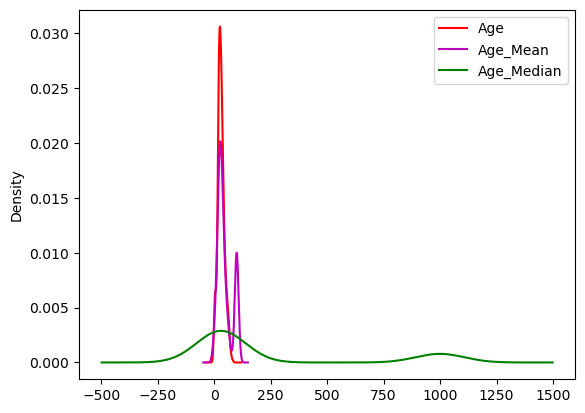

In [32]:
fig = plt.figure()
ax = fig.add_subplot()

x_train['Age'].plot(kind='kde',ax=ax, color='r')
x_train['Age_Mean'].plot(kind='kde', ax=ax, color='m')
x_train['Age_Median'].plot(kind='kde',ax=ax, color='g')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

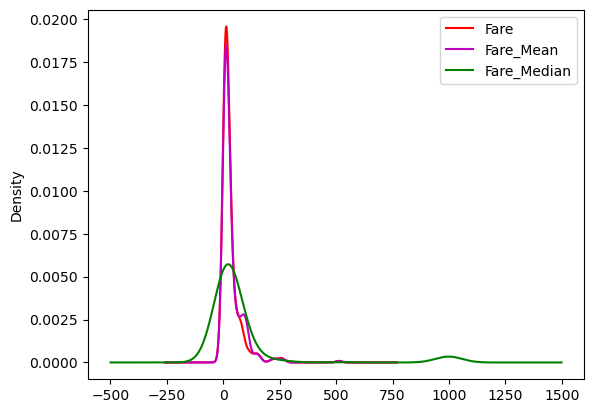

In [33]:
fig = plt.figure()
ax = fig.add_subplot()

x_train['Fare'].plot(kind='kde',ax=ax, color='r')
x_train['Fare_Mean'].plot(kind='kde', ax=ax, color='m')
x_train['Fare_Median'].plot(kind='kde',ax=ax, color='g')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

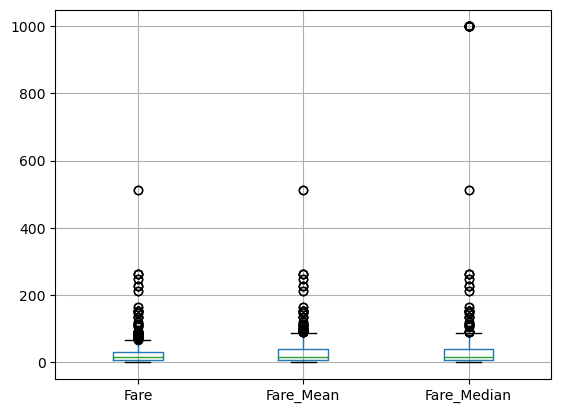

In [34]:
x_train[['Fare','Fare_Mean','Fare_Median']].boxplot()
plt.show()

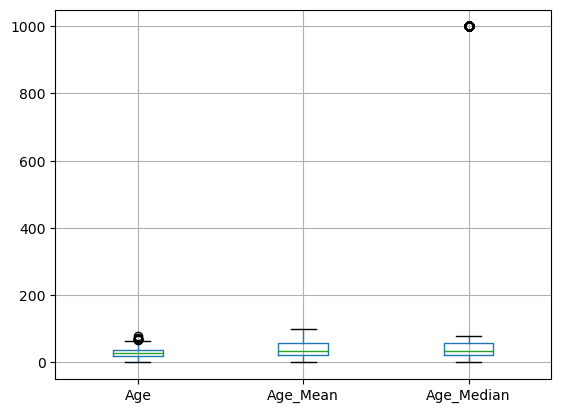

In [35]:
x_train[['Age','Age_Mean','Age_Median']].boxplot()
plt.show()

# Arbitrary Value Imputation using Sklearn

In [36]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'])

In [41]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [42]:
trf1 = ColumnTransformer([
    ('impute1',imputer1,['Age']),
    ('impute2',imputer2,['Fare']),
])

In [43]:
trf1.fit(x_train)

ColumnTransformer(transformers=[('impute1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('impute2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [44]:
trf1.named_transformers_['impute1'].statistics_

array([99.])

In [45]:
trf1.named_transformers_['impute2'].statistics_

array([999.])

In [46]:
x_train = trf1.transform(x_train)
x_test = trf1.transform(x_test)